In [1]:
#Simpson's rule is used for a single interval
import math
def simpson_one_interval(f, a, b):
    """
    Simpson's 1/3 Rule for a single interval [a, b].
    (Uses 3 points: a, midpoint, b)
    """
    h = (b - a) / 2
    x0, x1, x2 = a, a + h, b
    return (h / 3) * (f(x0) + 4*f(x1) + f(x2))

def composite_simpson_loop(f, a, b, n):
    """
    Composite Simpson's 1/3 Rule implemented using repeated single-interval Simpson calls.
    n must be even (because each Simpson application spans 2 subintervals).
    """
    if n % 2 != 0:
        raise ValueError("n must be even for Simpson's 1/3 rule")

    h = (b - a) / n
    I_total = 0.0
    
    # Apply Simpson's rule to each *pair* of subintervals
    for i in range(0, n, 2):
        sub_a = a + i * h
        sub_b = a + (i + 2) * h
        I_total += simpson_one_interval(f, sub_a, sub_b)
    
    return I_total

#This interval can be divided into many sub intervals

# Function to integrate
def f(x):
    return 1 / (1 + x**2)

# Interval [0, 1]
a, b = 0, 1
I_exact = math.pi / 4

# Approximation using single Simpson interval (no division)
I_approx = simpson_one_interval(f, a, b)
print(f"Approximate integral (single interval) = {I_approx:.8f}")
print(f"Exact integral                          = {I_exact:.8f}")
print(f"Error                                   = {abs(I_approx - I_exact):.3e}\n")

# Number of subintervals (must be even)
ns = [4, 8, 16, 32, 64, 128]

# Arrays to store results
I_approx_array = [0.0 for _ in range(len(ns))]
errors_array = [0.0 for _ in range(len(ns))]

# Compute approximations using composite Simpson's rule
for idx, n in enumerate(ns):
    I_total = composite_simpson_loop(f, a, b, n)
    I_approx_array[idx] = I_total
    errors_array[idx] = abs(I_total - I_exact)

# Print results
for n, I_val, err in zip(ns, I_approx_array, errors_array):
    print(f"n={n:3d}, I_approx={I_val:.10f}, error={err:.3e}")

Approximate integral (single interval) = 0.78333333
Exact integral                          = 0.78539816
Error                                   = 2.065e-03

n=  4, I_approx=0.7853921569, error=6.007e-06
n=  8, I_approx=0.7853981256, error=3.778e-08
n= 16, I_approx=0.7853981628, error=5.912e-10
n= 32, I_approx=0.7853981634, error=9.239e-12
n= 64, I_approx=0.7853981634, error=1.442e-13
n=128, I_approx=0.7853981634, error=2.331e-15


Estimated slope: 5.99973067052812


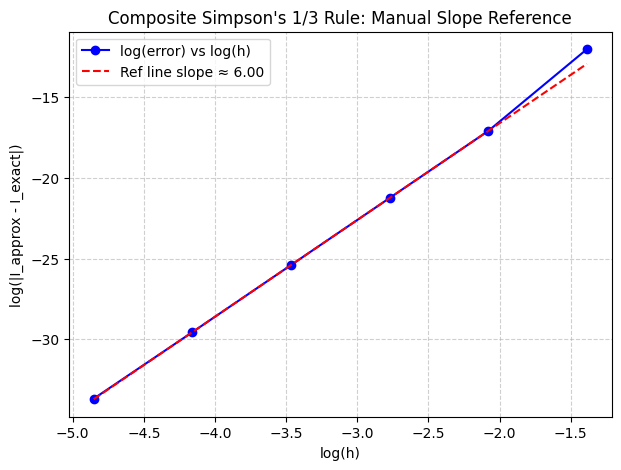

In [2]:
import math
import matplotlib.pyplot as plt

# Step sizes and errors
ns = [4, 8, 16, 32, 64, 128]
a, b = 0, 1
hs = [(b - a)/n for n in ns]
errors_list = [6.007e-06, 3.778e-08, 5.912e-10, 9.239e-12, 1.442e-13, 2.331e-15]

# Log values
log_h = [math.log(h) for h in hs]
log_error = [math.log(e) for e in errors_list]

# Compute slopes between consecutive points
slopes = []
for i in range(1, len(log_h)):
    slope = (log_error[i] - log_error[i-1]) / (log_h[i] - log_h[i-1])
    slopes.append(slope)

# Take average slope of middle 3 points (avoiding extremes)
avg_slope = sum(slopes[1:4])/3
print("Estimated slope:", avg_slope)

# Reference line using middle point
mid_idx = len(log_h)//2
x_ref = log_h[mid_idx]
y_ref = log_error[mid_idx]
# Reference line values
x_fit = [min(log_h), max(log_h)]
y_fit = [y_ref + avg_slope*(x - x_ref) for x in x_fit]

# Plot
plt.figure(figsize=(7,5))
plt.plot(log_h, log_error, 'o-', color='blue', label='log(error) vs log(h)')
plt.plot(x_fit, y_fit, '--', color='red', label=f'Ref line slope ≈ {avg_slope:.2f}')
plt.xlabel('log(h)')
plt.ylabel('log(|I_approx - I_exact|)')
plt.title("Composite Simpson's 1/3 Rule: Manual Slope Reference")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()